<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [129]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [130]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



<function matplotlib.pyplot.show(*args, **kw)>

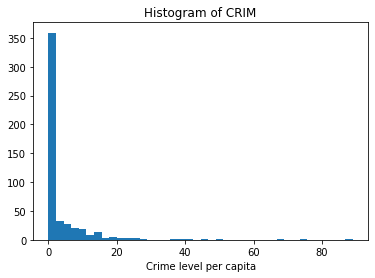

In [132]:
# распределение похоже на экспоненциальное
plt.hist(data.CRIM, 40)
plt.xlabel('Crime level per capita')
plt.title('Histogram of CRIM')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

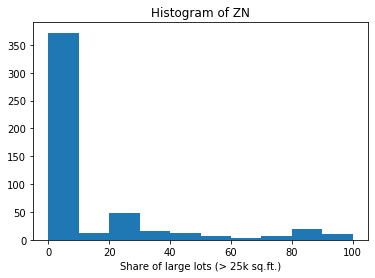

In [133]:
# распределение похоже чем-то на экспоненциальное, есть правда значения, которые несколько не укладываются в общую логику
plt.hist(data.ZN, 10)
plt.xlabel('Share of large lots (> 25k sq.ft.)')
plt.title('Histogram of ZN')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

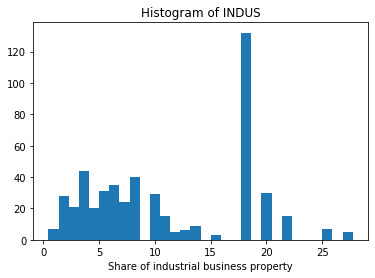

In [134]:
# я бы сказала, что это распределение ближе к нормальному. Оно смещено вправо. И есть много пропусков (мало данных).
plt.hist(data.INDUS, 30)
plt.xlabel('Share of industrial business property')
plt.title('Histogram of INDUS')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

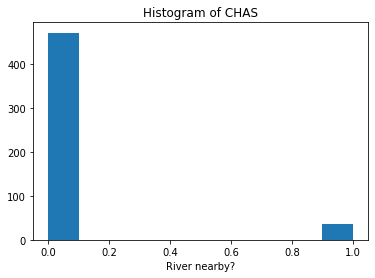

In [135]:
# Распределение Бернулли.
plt.hist(data.CHAS)
plt.xlabel('River nearby?')
plt.title('Histogram of CHAS')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

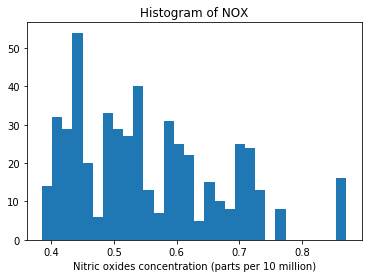

In [136]:
# я бы сказала, что это распределение ближе к логнормальному. 
plt.hist(data.NOX, 30)
plt.xlabel('Nitric oxides concentration (parts per 10 million)')
plt.title('Histogram of NOX')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

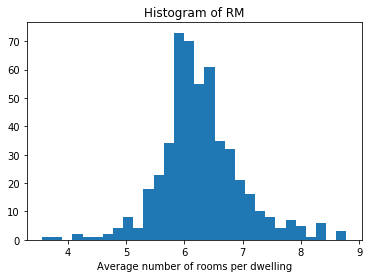

In [137]:
# нормальное распределение. 
plt.hist(data.RM, 30)
plt.xlabel('Average number of rooms per dwelling')
plt.title('Histogram of RM')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

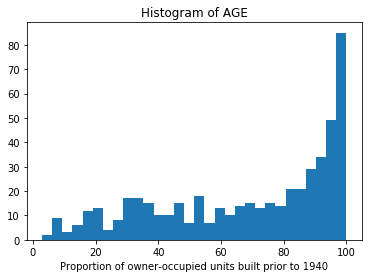

In [138]:
# экспоненциальное распределение, развернутое в другую сторону. Так может быть? 
plt.hist(data.AGE, 30)
plt.xlabel('Proportion of owner-occupied units built prior to 1940')
plt.title('Histogram of AGE')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

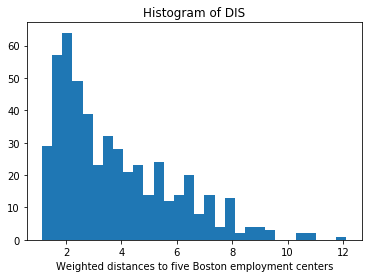

In [139]:
# логнормальное распределение 
plt.hist(data.DIS, 30)
plt.xlabel('Weighted distances to five Boston employment centers')
plt.title('Histogram of DIS')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

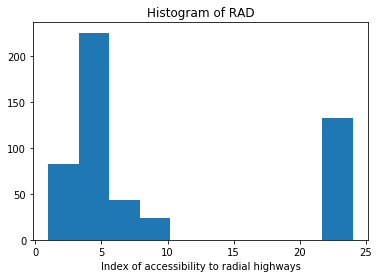

In [140]:
# Распределение Бернулли
plt.hist(data.RAD)
plt.xlabel('Index of accessibility to radial highways')
plt.title('Histogram of RAD')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

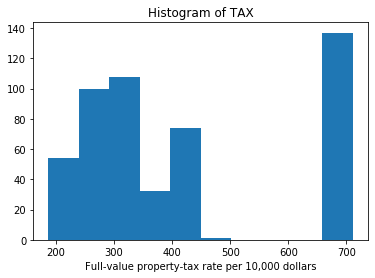

In [141]:
# биноминальное распределение
plt.hist(data.TAX)
plt.xlabel('Full-value property-tax rate per 10,000 dollars')
plt.title('Histogram of TAX')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

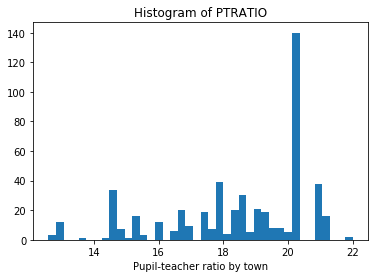

In [142]:
plt.hist(data.PTRATIO, 40)
plt.xlabel('Pupil-teacher ratio by town')
plt.title('Histogram of PTRATIO')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

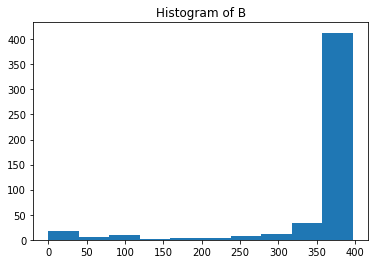

In [143]:
# экспоненциальное распределение, развернутое в другую сторону. Так может быть? 
plt.hist(data.B)
plt.title('Histogram of B')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

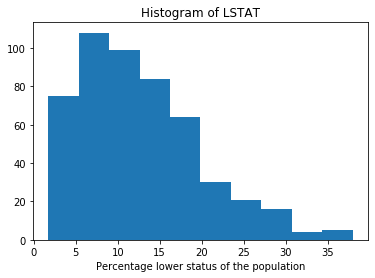

In [144]:
# логнормальное распределение 
plt.hist(data.LSTAT)
plt.xlabel('Percentage lower status of the population')
plt.title('Histogram of LSTAT')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

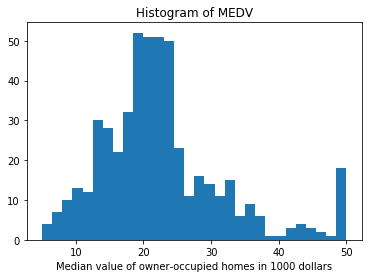

In [145]:
# нормальное распределение 
plt.hist(data.MEDV, 30)
plt.xlabel('Median value of owner-occupied homes in 1000 dollars')
plt.title('Histogram of MEDV')
plt.show

Построить матрицу корреляции для данной таблицы и выбрать максимально атрибуты, коррелирующие с ценой дома

In [146]:
data.corr().style.background_gradient(cmap='BuGn').set_precision(2)
#цена дома не сильно коррелирует с прочими атрибутами по отдельности. Есть только два атрибута, где мы можем сказать,
#что цена дома с ними коррелирует: кол-во комнат в доме (0.7) и обратная корреляция с % низкостатусного населения (-0.74) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [147]:
LSTAT = np.array(data.LSTAT).reshape(-1, 1)
MEDV = np.array(data.MEDV).reshape(-1, 1)

In [148]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [149]:
from sklearn.model_selection import train_test_split

# x = LSTAT,
# y = MEDV
i = 1
score_list = []
while i < 6:
    x_train, x_test, y_train, y_test = train_test_split(LSTAT, MEDV, test_size = 0.2)
    model.fit(x_train, y_train)
    Predicted_MEDV = model.predict(x_test)
    score_list.append(model.score(x_test, y_test))
    i += 1
x_train, x_test, y_train, y_test = train_test_split(LSTAT, MEDV, test_size = 0.2)
model.fit(x_train, y_train)
Predicted_MEDV = model.predict(x_test)

In [150]:
sum(score_list) / len(score_list)

0.5049101858035285

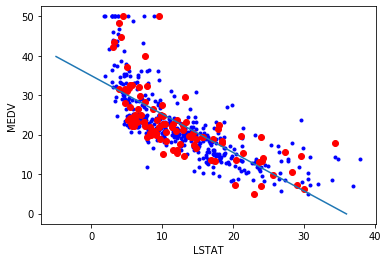

In [151]:
plt.plot(x_train, y_train, 'b.')
plt.plot(x_test, y_test, 'ro')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
x = np.linspace(-5, 36, 40)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x, y)

линейная регрессия здесь не подходит. Это видно и по графику, и по ошибке модели. Скорее надо строить не линейную регрессию, а уравнение экспоненциального распределения.

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [177]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [178]:
df_nn = df.dropna()
df_nn.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2088.550668,1171.892806,1037.040699,1097.680164,1745.007194,1126.437205,437.435971,992.822302,1625.961768,1661.550154
SD of Ladder,1171.892806,2127.170144,184.695683,1298.799281,1268.032374,520.631655,498.416547,796.974460,1327.720144,1293.221942
Positive affect,1037.040699,184.695683,1965.293114,694.321274,880.136691,1392.962795,427.188489,826.971942,597.456937,661.012436
Negative affect,1097.680164,1298.799281,694.321274,1980.795272,1369.014388,835.041521,316.040288,697.807914,1091.695581,992.679651
Social support,1745.007194,1268.032374,880.136691,1369.014388,2099.086331,989.151079,290.978417,918.334532,1592.892086,1521.895683
Freedom,1126.437205,520.631655,1392.962795,835.041521,989.151079,2034.819322,784.235971,1005.233094,754.765057,841.068243
Corruption,437.435971,498.416547,427.188489,316.040288,290.978417,784.235971,1819.535252,536.400719,344.248921,279.475540
Generosity,992.822302,796.974460,826.971942,697.807914,918.334532,1005.233094,536.400719,2000.574460,891.584892,891.374460
Log of GDP\nper capita,1625.961768,1327.720144,597.456937,1091.695581,1592.892086,754.765057,344.248921,891.584892,1879.769579,1665.842035
Healthy life\nexpectancy,1661.550154,1293.221942,661.012436,992.679651,1521.895683,841.068243,279.475540,891.374460,1665.842035,1934.236948


In [179]:
df_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           140 non-null object
Ladder                     140 non-null int64
SD of Ladder               140 non-null int64
Positive affect            140 non-null float64
Negative affect            140 non-null float64
Social support             140 non-null float64
Freedom                    140 non-null float64
Corruption                 140 non-null float64
Generosity                 140 non-null float64
Log of GDP
per capita      140 non-null float64
Healthy life
expectancy    140 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.1+ KB


In [181]:
df_nn[['Ladder', 'Healthy life\nexpectancy']].cov()

,Ladder,Healthy life\nexpectancy
Ladder,2088.550668,1661.550154
Healthy life\nexpectancy,1661.550154,1934.236948


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [182]:
# по одному значению в колонках Possitive affect, Negative affect, Social support, Freedom, Generosity,
# 8 в колонке Corruption, 4 - Log of GDP per capita, 6 - Healthy life expectancy 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


Сколько стран в выборке? Написать ответ. 

In [157]:
len(df['Country (region)'])

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [184]:
df_nn.corr().style.background_gradient(cmap='BuGn').set_precision(2)
#высокий уровень корреляции у Log of GDP per capita и Healthy life expectancy (0.87)
#чуть ниже, но все равно выше 0.8 корреляцию у Ladder и Healthy life expectancy (0.83),  Social support (0.83)
#и Log of GDP per capita (0.82). Ну и более или менее высокая корр. у Social support и Log of GDP per capita и
#Healthy life expectancy

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.56,0.51,0.54,0.83,0.55,0.22,0.49,0.82,0.83
SD of Ladder,0.56,1,0.09,0.63,0.6,0.25,0.25,0.39,0.66,0.64
Positive affect,0.51,0.09,1,0.35,0.43,0.7,0.23,0.42,0.31,0.34
Negative affect,0.54,0.63,0.35,1,0.67,0.42,0.17,0.35,0.57,0.51
Social support,0.83,0.6,0.43,0.67,1,0.48,0.15,0.45,0.8,0.76
Freedom,0.55,0.25,0.7,0.42,0.48,1,0.41,0.5,0.39,0.42
Corruption,0.22,0.25,0.23,0.17,0.15,0.41,1,0.28,0.19,0.15
Generosity,0.49,0.39,0.42,0.35,0.45,0.5,0.28,1,0.46,0.45
Log of GDP per capita,0.82,0.66,0.31,0.57,0.8,0.39,0.19,0.46,1,0.87
Healthy life expectancy,0.83,0.64,0.34,0.51,0.76,0.42,0.15,0.45,0.87,1


# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [208]:
import random
def dice(num):
    res_list = []
    result = {}
    for i in range(int(num)):
        n = random.choice([1, 2, 3, 4, 5, 6])
        res_list.append(n)
        if n in result.keys():
            result[n] += 1
        else:
            result[n] = 1
    return res_list 

<function matplotlib.pyplot.show(*args, **kw)>

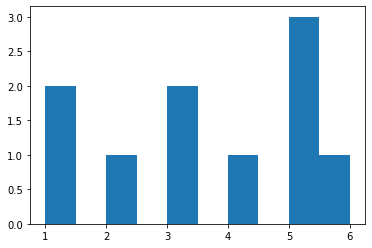

In [214]:
plt.hist(dice(10), 10)
plt.show
# Распределение Бернулли

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [217]:
tries_list = []
for i in range(1000):
    tries_list.append(sum(dice(100)))

<function matplotlib.pyplot.show(*args, **kw)>

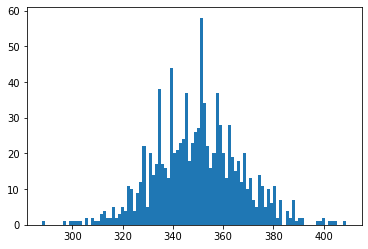

In [218]:
plt.hist(tries_list, 100)
plt.show
# нормальное распределение. Можно применить центральную предельную теорему, так как кол-во испытаний велико.
# соответственно, в действии закон больших чисел.